# Assignment 23 Jessica Ayivi

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve
import matplotlib.pyplot as plt

In [28]:
#import and remove missing values dataset 
df=pd.read_csv("C:/Users/Administrateur/OneDrive/Bureau/ESCPTerm2/NLP/small_train.csv")#[883490 rows x 4 columns]
df.dropna(inplace=True)
df

,ID,keywords,age,sex
1,361410,forum:3;contrat:1;calcul:3;conges:1;mission:4;...,47,M
2,211450,villa:1;location:2;aquitaine:2;maison:1;vacanc...,61,F
3,1368807,trafic:1;tournante:1;drogue:1;france:1;plaque:...,45,M
4,3502570,trafic:1;septembre:1;greve:1;sncf:1;sortir:1;p...,22,M
5,2027488,darmanin:1;pour:1;ferme:1;jcms:1;conjoncture:1...,55,M
...,...,...,...,...
999993,878235,prenoms:1;prenom:1;aidan:1,33,F
999994,730507,programme:1;hemorroides:1;moix:1;symptomes:1;c...,43,M
999996,1351077,comment:1;faq:1;choisir:1;velo:1;avec:1;joueur...,53,M
999997,40194,salon:1;clash:1;maman:5;gout:1;doues:1;addicti...,54,F


In [29]:
#replacing M by 0 and F by 1
df["sex"]=df["sex"].replace("M",0)
df["sex"]=df["sex"].replace("F",1)
#or df['sex'] = data.sex.map({'M': 0, 'F': 1}), but this version is too long to charge 
df

,ID,keywords,age,sex
1,361410,forum:3;contrat:1;calcul:3;conges:1;mission:4;...,47,0
2,211450,villa:1;location:2;aquitaine:2;maison:1;vacanc...,61,1
3,1368807,trafic:1;tournante:1;drogue:1;france:1;plaque:...,45,0
4,3502570,trafic:1;septembre:1;greve:1;sncf:1;sortir:1;p...,22,0
5,2027488,darmanin:1;pour:1;ferme:1;jcms:1;conjoncture:1...,55,0
...,...,...,...,...
999993,878235,prenoms:1;prenom:1;aidan:1,33,1
999994,730507,programme:1;hemorroides:1;moix:1;symptomes:1;c...,43,0
999996,1351077,comment:1;faq:1;choisir:1;velo:1;avec:1;joueur...,53,0
999997,40194,salon:1;clash:1;maman:5;gout:1;doues:1;addicti...,54,1


## CLEANING TRAINING DATASET

In [ ]:
#we can notice that a lot of words in the dataset are just creating noise, they are not necessary in our prediction algorithm
#But while thinking about I decided to try test the prediction with and without removing stopwords becaus I thought that maybe
#the usage of some stop specific stopwords could give us further information regarding the person which is using them
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
''''stop_words = stopwords.words()
porter = PorterStemmer()
def cleantext(counttext):
    wordcounts=counttext.split(";")
    text=""
    for words in wordcounts:
        wordocr=words.split(":")
        if len(wordocr)>1 and not wordocr[0] in stop_words :
            wordocr[0]=porter.stem(wordocr[0])
            text+=(wordocr[0]+" ")*int(wordocr[1])
    return text
df=df[df["keywords"].str.contains(":")]
df["keywords"]=df["keywords"].map(lambda x: cleantext(x))

In [30]:
df = df[df["keywords"].str.contains("\:")] #keeping only lines keyword stored
df.to_csv("train_clean.csv",index=False,sep=',')
print(df)
df.head(10)

             ID                                           keywords  age  sex
1        361410  forum:3;contrat:1;calcul:3;conges:1;mission:4;...   47    0
2        211450  villa:1;location:2;aquitaine:2;maison:1;vacanc...   61    1
3       1368807  trafic:1;tournante:1;drogue:1;france:1;plaque:...   45    0
4       3502570  trafic:1;septembre:1;greve:1;sncf:1;sortir:1;p...   22    0
5       2027488  darmanin:1;pour:1;ferme:1;jcms:1;conjoncture:1...   55    0
...         ...                                                ...  ...  ...
999993   878235                         prenoms:1;prenom:1;aidan:1   33    1
999994   730507  programme:1;hemorroides:1;moix:1;symptomes:1;c...   43    0
999996  1351077  comment:1;faq:1;choisir:1;velo:1;avec:1;joueur...   53    0
999997    40194  salon:1;clash:1;maman:5;gout:1;doues:1;addicti...   54    1
999998   120760  obseques:1;flash:2;policier:1;macron:1;chez:1;...   32    1

[883490 rows x 4 columns]


,ID,keywords,age,sex
1,361410,forum:3;contrat:1;calcul:3;conges:1;mission:4;...,47,0
2,211450,villa:1;location:2;aquitaine:2;maison:1;vacanc...,61,1
3,1368807,trafic:1;tournante:1;drogue:1;france:1;plaque:...,45,0
4,3502570,trafic:1;septembre:1;greve:1;sncf:1;sortir:1;p...,22,0
5,2027488,darmanin:1;pour:1;ferme:1;jcms:1;conjoncture:1...,55,0
6,1416034,pinel:1;seront:1;prolonges:1;jcms:1;mais:1;p1_...,57,0
7,625475,ruent:1;28a86c911c0f:1;article:1;8f28:1;scpi_c...,34,1
8,623415,laryngite:1;causes:1;faq:1;symptomes:1;traitem...,44,0
9,1294086,ces:1;jeunes:1;penn:1;elmaleh:1;celebrites:1;a...,40,0
10,557695,les:1;plateau:1;programme:1;nouveau:1;28a86c91...,67,1


## CLEANING TESTING DATASSET

In [31]:
test=pd.read_csv("C:/Users/Administrateur/OneDrive/Bureau/ESCPTerm2/NLP/small_test.csv")  # [499999 rows x 4 columns]
test.dropna(subset=["keywords"], inplace=True) #[442190 rows x 4 columns]
test = test[test["keywords"].str.contains("\:")] #keeping only lines keyword stored, [442189 rows x 4 columns], we just lost one line

## TF-IDF VECTORIZER

In [32]:
#Splitting the training dataset into train and test dataset
X_train,X_test,y_train,y_test,z_train,z_test = train_test_split(df["keywords"],df["sex"],df["age"], test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(z_train.shape)
print(z_test.shape)

(706792,)
(176698,)
(706792,)
(176698,)
(706792,)
(176698,)


In [33]:
vc_tf_idf = TfidfVectorizer()
vc_tf_idf.fit(X_train.apply(lambda x: np.str_(x)))
print("Vocabulary size: {}".format(len(vc_tf_idf.vocabulary_)))
X_train_df = vc_tf_idf.transform(X_train.apply(lambda x: np.str_(x)))
X_train_df[:3].nonzero()
prediction = dict()

Vocabulary size: 227826


In [34]:
# choosing the best features/model, here I tested all the model in order to fin the best one
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [39]:
models = [LogisticRegression(max_iter=10000), MultinomialNB(), RandomForestClassifier(n_estimators=2000,max_depth=8)]
#LogisticRegression(random_state=0,solver='lbfgs', max_iter=10000)

In [ ]:
CREATION OF SEVERAL MODEL TO TEST TO PREDICT SEX VARIABLE

In [ ]:
Build model for "Sex" and store result

LogisticRegression(max_iter=10000)
accuracy: 0.6168434277694145
confusion matrix
[[68186 26532]
 [41171 40809]]
normalized confusion matrix
[[0.71988429 0.28011571]
 [0.50220786 0.49779214]]
 

              precision    recall  f1-score   support

           0       0.62      0.72      0.67     94718
           1       0.61      0.50      0.55     81980

    accuracy                           0.62    176698
   macro avg       0.61      0.61      0.61    176698
weighted avg       0.62      0.62      0.61    176698

train score: 0.6772289443004448


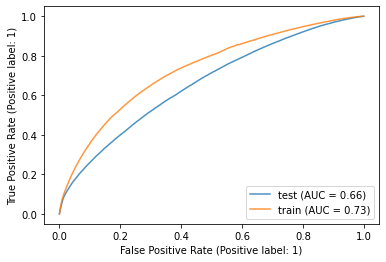

MultinomialNB()
accuracy: 0.6128365912460809
confusion matrix
[[71947 22771]
 [45640 36340]]
normalized confusion matrix
[[0.75959163 0.24040837]
 [0.55672115 0.44327885]]
 

              precision    recall  f1-score   support

           0       0.61      0.76      0.68     94718
           1       0.61      0.44      0.52     81980

    accuracy                           0.61    176698
   macro avg       0.61      0.60      0.60    176698
weighted avg       0.61      0.61      0.60    176698

train score: 0.6650499722690693


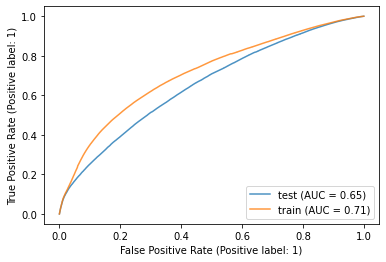

RandomForestClassifier(max_depth=8, n_estimators=2000)
accuracy: 0.5542337774055167
confusion matrix
[[93950   768]
 [77998  3982]]
normalized confusion matrix
[[0.99189172 0.00810828]
 [0.95142718 0.04857282]]
 

              precision    recall  f1-score   support

           0       0.55      0.99      0.70     94718
           1       0.84      0.05      0.09     81980

    accuracy                           0.55    176698
   macro avg       0.69      0.52      0.40    176698
weighted avg       0.68      0.55      0.42    176698

train score: 0.5554420536734994


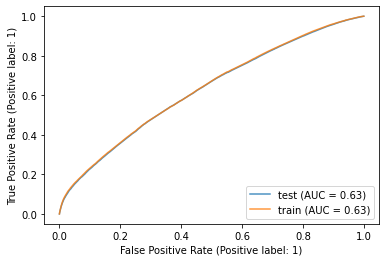

In [40]:
# testing all the models, to find the one with the highest accuracy
#I tried using SVC algorithm but, there was a memory error, with this message:
# MemoryError: Unable to allocate 200. MiB for an array with shape (26167568,) and data type float64
for i in models:
    i.fit(X_train_df, y_train)  # X_train_df: count vectors
    X_test_df = vc_tf_idf.transform(X_test)
    prediction[i] = i.predict(X_test_df)
    print(str(i))
    # assessing the model
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

    print("accuracy:", accuracy_score(y_test, prediction[i]))
    conf_mat = confusion_matrix(y_test, prediction[i])
    print("confusion matrix", conf_mat, sep='\n')
    conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

    print("normalized confusion matrix",conf_mat_normalized, " ", sep='\n')
    print()

    print(classification_report(y_test, prediction[i]))
    print("train score:", i.score(X_train_df, y_train))

    ax = plt.gca()
    test_rf = plot_roc_curve(i, X_test_df, y_test, ax=ax, alpha=0.8, name="test")
    train_rf = plot_roc_curve(i, X_train_df, y_train, ax=ax, alpha=0.8, name="train")
    plt.show()


In [ ]:
#we tested the algortihm with the countvectorizer vectorizer,
#but we are getting better result with the TF-IDF vectozier

LogisticRegression(max_iter=10000)
accuracy: 0.6168434277694145
confusion matrix
[[68186 26532]
 [41171 40809]]
normalized confusion matrix
[[0.71988429 0.28011571]
 [0.50220786 0.49779214]]
 

              precision    recall  f1-score   support

           0       0.62      0.72      0.67     94718
           1       0.61      0.50      0.55     81980

    accuracy                           0.62    176698
   macro avg       0.61      0.61      0.61    176698
weighted avg       0.62      0.62      0.61    176698

train score: 0.6772289443004448


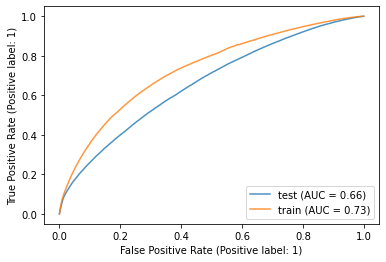

In [47]:
#putting the result into a dataset
i = LogisticRegression(max_iter=10000)
i.fit(X_train_df, y_train)  # X_train_df: count vectors
X_test_df = vc_tf_idf.transform(X_test)
prediction[i] = i.predict(X_test_df)
print(str(i))
# assessing the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("accuracy:", accuracy_score(y_test, prediction[i]))
conf_mat = confusion_matrix(y_test, prediction[i])
print("confusion matrix", conf_mat, sep='\n')
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

print("normalized confusion matrix",conf_mat_normalized, " ", sep='\n')
print()

print(classification_report(y_test, prediction[i]))
print("train score:", i.score(X_train_df, y_train))

ax = plt.gca()
test_rf = plot_roc_curve(i, X_test_df, y_test, ax=ax, alpha=0.8, name="test")
train_rf = plot_roc_curve(i, X_train_df, y_train, ax=ax, alpha=0.8, name="train")
plt.show()
X_test_final = vc_tf_idf.transform(test["keywords"].apply(lambda x: np.str_(x)))
result=pd.DataFrame()
result["ID"]=test["ID"]

result["sex_pred"]=i.predict(X_test_final)

In [48]:
X_test_final = vc_tf_idf.transform(test["keywords"].apply(lambda x: np.str_(x)))
result=pd.DataFrame()
result["ID"]=test["ID"]

result["sex_pred"]=i.predict(X_test_final)

In [49]:
result.to_csv("test_result.csv",index=False,sep=',')

## Build model for "Age" and store results

In [51]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(alpha=0.00001,max_iter=10000,random_state=42)
sgd.fit(X_train_df,z_train)

SGDRegressor(alpha=1e-05, max_iter=10000, random_state=42)

In [52]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
predictionage = dict()
X_test_df = vc_tf_idf.transform(X_test)
predictionage["sgd"] = sgd.predict(X_test_df)
print("Mean square error:%.4f"%(mean_squared_error(z_test,predictionage["sgd"])))
print("Mean absolute error:%.4f"%(mean_absolute_error(z_test,predictionage["sgd"])))
print("R square: ", '{:.2%}'.format(r2_score(z_test,predictionage["sgd"])))

Mean square error:155.2508
Mean absolute error:9.9764
R square:  10.27%


In [53]:
print(classification_report(np.floor((z_test+5)/10)*10,np.floor((predictionage["sgd"]+5)/10)*10))
# 10 stands for age group between 5-15, 20 stands for age group between 15-25 and so on

C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        10.0       0.00      0.00      0.00       404
        20.0       0.00      0.00      0.00      9232
        30.0       0.31      0.01      0.02     25079
        40.0       0.36      0.55      0.43     51241
        50.0       0.26      0.55      0.36     44397
        60.0       0.31      0.04      0.08     30556
        70.0       0.15      0.00      0.00     13926
        80.0       0.00      0.00      0.00      1737
        90.0       0.00      0.00      0.00       113
       100.0       0.00      0.00      0.00        13

    accuracy                           0.31    176698
   macro avg       0.14      0.12      0.09    176698
weighted avg       0.28      0.31      0.23    176698



C:\Users\Administrateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
predictionage["dif"]=predictionage["sgd"]-z_test
predictionage["dif"]=predictionage["dif"].map(lambda x: 0 if abs(x)>5 else 1)
print("1 stands for the precision rate of the whole test data")
print(predictionage["dif"].value_counts(1))

1 stands for the precision rate of the whole test data
0    0.691689
1    0.308311
Name: age, dtype: float64


In [55]:
result=pd.read_csv("test_result.csv")
result["age_pred"]=sgd.predict(X_test_final)
result.to_csv("test_result.csv",index=False,sep=',')

## COUNT VECTORIZER TO PREDICT THE SEX (the results are better with TF-IDF)

In [12]:
#import and remove missing values dataset 
df=pd.read_csv("C:/Users/Administrateur/OneDrive/Bureau/ESCPTerm2/NLP/small_train.csv")#[883490 rows x 4 columns]
df.dropna(inplace=True)
df
#replacing M by 0 and F by 1
df["sex"]=df["sex"].replace("M",0)
df["sex"]=df["sex"].replace("F",1)
#or df['sex'] = data.sex.map({'M': 0, 'F': 1}), but this version is too long to charge 
df
test=pd.read_csv("C:/Users/Administrateur/OneDrive/Bureau/ESCPTerm2/NLP/small_test.csv")  # [499999 rows x 4 columns]
test.dropna(subset=["keywords"], inplace=True) #[442190 rows x 4 columns]
test = test[test["keywords"].str.contains("\:")] #keeping only lines keyword stored, [442189 rows x 4 columns], we just lost one line

In [13]:
#Splitting the training dataset into train and test dataset
X_train,X_test,y_train,y_test,z_train,z_test = train_test_split(df["keywords"],df["sex"],df["age"], test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(z_train.shape)
print(z_test.shape)

(706792,)
(176698,)
(706792,)
(176698,)
(706792,)
(176698,)


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Scikit-learn’s CountVectorizer is used to
# convert a collection of text documents to a vector of term/token counts.
# list of text documents
vect = CountVectorizer()
# we are applying CountVectorizer on our dataset

vect.fit(X_train)
# tokenize, extract tokens and build vocab, dictionary of all the tokens

print("Vocabulary size: {}".format(len(vect.vocabulary_)))
# print("Vocabulary content:\n {}".format(vect.vocabulary_))
X_train_df = vect.transform(X_train)
# encode your data, represent your text as count vector(s)

X_train_df[:3].nonzero()
prediction = dict()

Vocabulary size: 227826


LogisticRegression(max_iter=10000, random_state=0)
accuracy: 0.608365686085864
confusion matrix
[[68605 26113]
 [43088 38892]]
normalized confusion matrix
[[0.72430795 0.27569205]
 [0.52559161 0.47440839]]
 

              precision    recall  f1-score   support

           0       0.61      0.72      0.66     94718
           1       0.60      0.47      0.53     81980

    accuracy                           0.61    176698
   macro avg       0.61      0.60      0.60    176698
weighted avg       0.61      0.61      0.60    176698

train score: 0.6980879806223047


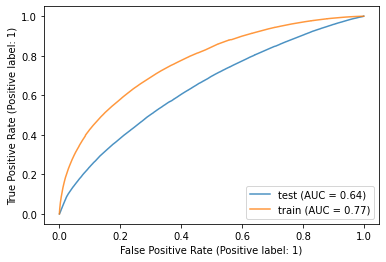

MultinomialNB()
accuracy: 0.6040985183759862
confusion matrix
[[77840 16878]
 [53077 28903]]
normalized confusion matrix
[[0.82180789 0.17819211]
 [0.6474384  0.3525616 ]]
 

              precision    recall  f1-score   support

           0       0.59      0.82      0.69     94718
           1       0.63      0.35      0.45     81980

    accuracy                           0.60    176698
   macro avg       0.61      0.59      0.57    176698
weighted avg       0.61      0.60      0.58    176698

train score: 0.6412565507249658


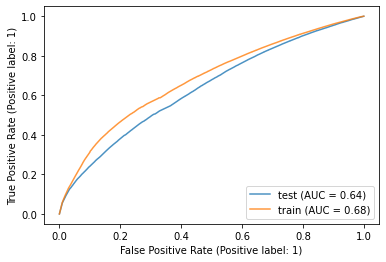

RandomForestClassifier(max_depth=8, n_estimators=2000)
accuracy: 0.5545507023282663
confusion matrix
[[93939   779]
 [77931  4049]]
normalized confusion matrix
[[0.99177559 0.00822441]
 [0.9506099  0.0493901 ]]
 

              precision    recall  f1-score   support

           0       0.55      0.99      0.70     94718
           1       0.84      0.05      0.09     81980

    accuracy                           0.55    176698
   macro avg       0.69      0.52      0.40    176698
weighted avg       0.68      0.55      0.42    176698

train score: 0.5558155723324543


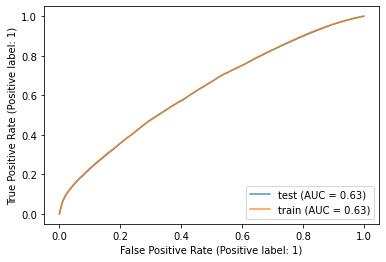

In [17]:
# testing all the models, to find the one with the highest accuracy
for i in models:
    i.fit(X_train_df, y_train)  # X_train_df: count vectors
    X_test_df = vect.transform(X_test)
    prediction[i] = i.predict(X_test_df)
    print(str(i))
    # assessing the model
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

    print("accuracy:", accuracy_score(y_test, prediction[i]))
    conf_mat = confusion_matrix(y_test, prediction[i])
    print("confusion matrix", conf_mat, sep='\n')
    conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

    print("normalized confusion matrix",conf_mat_normalized, " ", sep='\n')
    print()

    print(classification_report(y_test, prediction[i]))
    print("train score:", i.score(X_train_df, y_train))

    ax = plt.gca()
    test_rf = plot_roc_curve(i, X_test_df, y_test, ax=ax, alpha=0.8, name="test")
    train_rf = plot_roc_curve(i, X_train_df, y_train, ax=ax, alpha=0.8, name="train")
    plt.show()


In [ ]:
#The results, comparing the best models
#For every vectorizer, the best model is the logistic regression model with TF-IDF with an accuracy of 
#approximatively 0.62 percent